# Senior Project: AI vs Human Text

TO DO: Senior Project
---------------------------------------------------------------------------------

-- Compile Human Essays
	** How many essays? On what?
	** Emails, Letters, Paragraphs?
-- Compile AI Essays
	**Chatgpt, Ask for friends AI essays, Online?

-- Add MetaData For Sorting Ease
	** What else can make essays distinct for analysis?
	** Subject, Topic, Theme, Type?

-- Normalize, Tokenize Essays

-- Analitics? Insightful vs. Junk Words, Frequencies, Similarities and Differences.. Structure?

-- Visualization of Data
	**Graphs of frequency, pie-charts, junk? SHOW ALL DATA POINTS
	** Ask Sponsor?


--------------MORE??-------------


-- AI Model
	** RESEARCH WHAT MODEL IS BEST 
-- Create Interface to interact with AI
	** Input Text, Return whether AI or Human
-- Train, Tweak, Refine

-- Catelog Research/Findings
	** Process, Shortcomings, Successes, Does it Work?
	** Keep Track of Libraries, Types of Text
-- Slide Show
-- Presentation


---------------DONE??-------------

## Data Collection

### Currently using my old writing assignments and some random essays. 

## Data Preprocessing

!pip install python-docx

In [27]:
from docx import Document
from collections import Counter
import nltk
import os
import pandas as pd
import re
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist
import string
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency


# metadata calculation functions
def get_word_count(text):
    return len(text.split())

def get_sentence_count(text):
    sentences = re.split(r'[.!?]+', text)
    return len([s for s in sentences if s.strip()])

def get_avg_word_length(text):
    words = text.split()
    if words:
        return sum(len(word) for word in words) / len(words)
    else:
        return 0

def get_paragraph_count(text):
    paragraphs = text.split('\n\n') 
    return len([p for p in paragraphs if p.strip()])

def get_lexical_diversity(text):
    words = text.split()
    unique_words = set(words)
    if words:
        return len(unique_words) / len(words)
    else:
        return 0

def remove_after_works_cited(text):
    lower_text = text.lower()
    reference_headings = ["works cited", "references", "bibliography", "reference list"]
    
    for heading in reference_headings:
        index = lower_text.find(heading)
        if index != -1:
            return text[:index]

    return text

def get_comma_count(text):
    return text.count(',')

def get_adjective_count(text):
    tokens = word_tokenize(text)
    tagged_tokens = pos_tag(tokens)
    adjectives = [word for word, tag in tagged_tokens if tag.startswith('JJ')]
    return len(adjectives)

def get_semicolon_count(text):
    return text.count(';')

def preprocess_text(text):
    text = re.sub(r"\b's\b", "", text) 
    text = re.sub(r"'\b|\b'|''", "", text)  
    text = text.lower()
    
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalnum()]
    
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return tokens

# Function to process Word documents and extract metadata
def docx_to_text_and_metadata(path, label):
    doc = Document(path)
    full_text = '\n\n'.join(paragraph.text for paragraph in doc.paragraphs if paragraph.text)
    cleaned_text = remove_after_works_cited(full_text)
    
    title = doc.core_properties.title
    subject = doc.core_properties.subject

    comma_count = get_comma_count(cleaned_text)
    adjective_count = get_adjective_count(cleaned_text)
    semicolon_count = get_semicolon_count(cleaned_text)
    word_count = get_word_count(cleaned_text)
    sentence_count = get_sentence_count(cleaned_text)
    avg_word_length = get_avg_word_length(cleaned_text)
    paragraph_count = get_paragraph_count(cleaned_text)
    lexical_diversity = get_lexical_diversity(cleaned_text)
    
    return {
        'text': cleaned_text,
        'title': title,
        'subject': subject,
        'comma_count': comma_count,
        'adjective_count': adjective_count,
        'semicolon_count': semicolon_count,
        'word_count': word_count,
        'sentence_count': sentence_count,
        'avg_word_length': avg_word_length,
        'paragraph_count': paragraph_count,
        'lexical_diversity': lexical_diversity,
        'file_name': os.path.basename(path),
        'label': label
    }

# Function to process a directory of essays
def process_essays_directory(docs_dir, label):
    doc_files = [f for f in os.listdir(docs_dir) if f.endswith('.docx')]
    docs_data = []

    for file_name in doc_files:
        file_path = os.path.join(docs_dir, file_name)
        doc_data = docx_to_text_and_metadata(file_path, label)
        docs_data.append(doc_data)

    return docs_data

# Path variables for essays
human_docs_dir = r'C:\Users\Colin\OneDrive\Desktop\Senior Project Code\Senior-Project\Human_Essays'  
ai_docs_dir = r'C:\Users\Colin\OneDrive\Desktop\Senior Project Code\Senior-Project\AI_Essays'  

# Process each directory with the appropriate label
human_docs_data = process_essays_directory(human_docs_dir, 'Human')
ai_docs_data = process_essays_directory(ai_docs_dir, 'AI')

all_docs_data = human_docs_data + ai_docs_data

df_all_docs = pd.DataFrame(all_docs_data)
df_all_docs.to_csv('combined_docs_with_metadata.csv', index=False)
print("Document data exported to 'combined_docs_with_metadata.csv'.")

Document data exported to 'combined_docs_with_metadata.csv'.


## Find Directory where .csv File is Stored

In [16]:
import os

current_directory = os.getcwd()
print(f"Current working directory: {current_directory}")

Current working directory: C:\Users\Colin


## Retrieve Lexical Statistics

### Before Cleaning Word Count

In [28]:
def raw_word_count(text):
    # Split the text on whitespace to get words
    words = re.split(r'\s+', text)
    words = [word for word in words if word]
    return len(words)

ai_raw_word_count = 0
human_raw_word_count = 0

# Loops through each essay and count the words
for index, row in df_all_docs.iterrows():
    word_count = raw_word_count(row['text'])
    if row['label'] == 'AI':
        ai_raw_word_count += word_count
    elif row['label'] == 'Human':
        human_raw_word_count += word_count

print(f"Total raw word count for AI essays: {ai_raw_word_count}")
print(f"Total raw word count for Human essays: {human_raw_word_count}")

Total raw word count for AI essays: 11787
Total raw word count for Human essays: 54826


### After Cleaning Word Count

In [29]:
ai_word_count = 0
human_word_count = 0

# Loop through each essay, preprocess, and count the words
for index, row in df_all_docs.iterrows():
    words = preprocess_text(row['text']) 
    if row['label'] == 'AI':
        ai_word_count += len(words)
    elif row['label'] == 'Human':
        human_word_count += len(words)

print(f"Cleaned total word count for AI essays: {ai_word_count}")
print(f"Cleaned total word count for Human essays: {human_word_count}")

Cleaned total word count for AI essays: 7273
Cleaned total word count for Human essays: 28123


## Attempt Visualization of All Most Frequent Words

In [30]:
all_words = []
for essay in df_all_docs['text']:  
    all_words.extend(preprocess_text(essay))

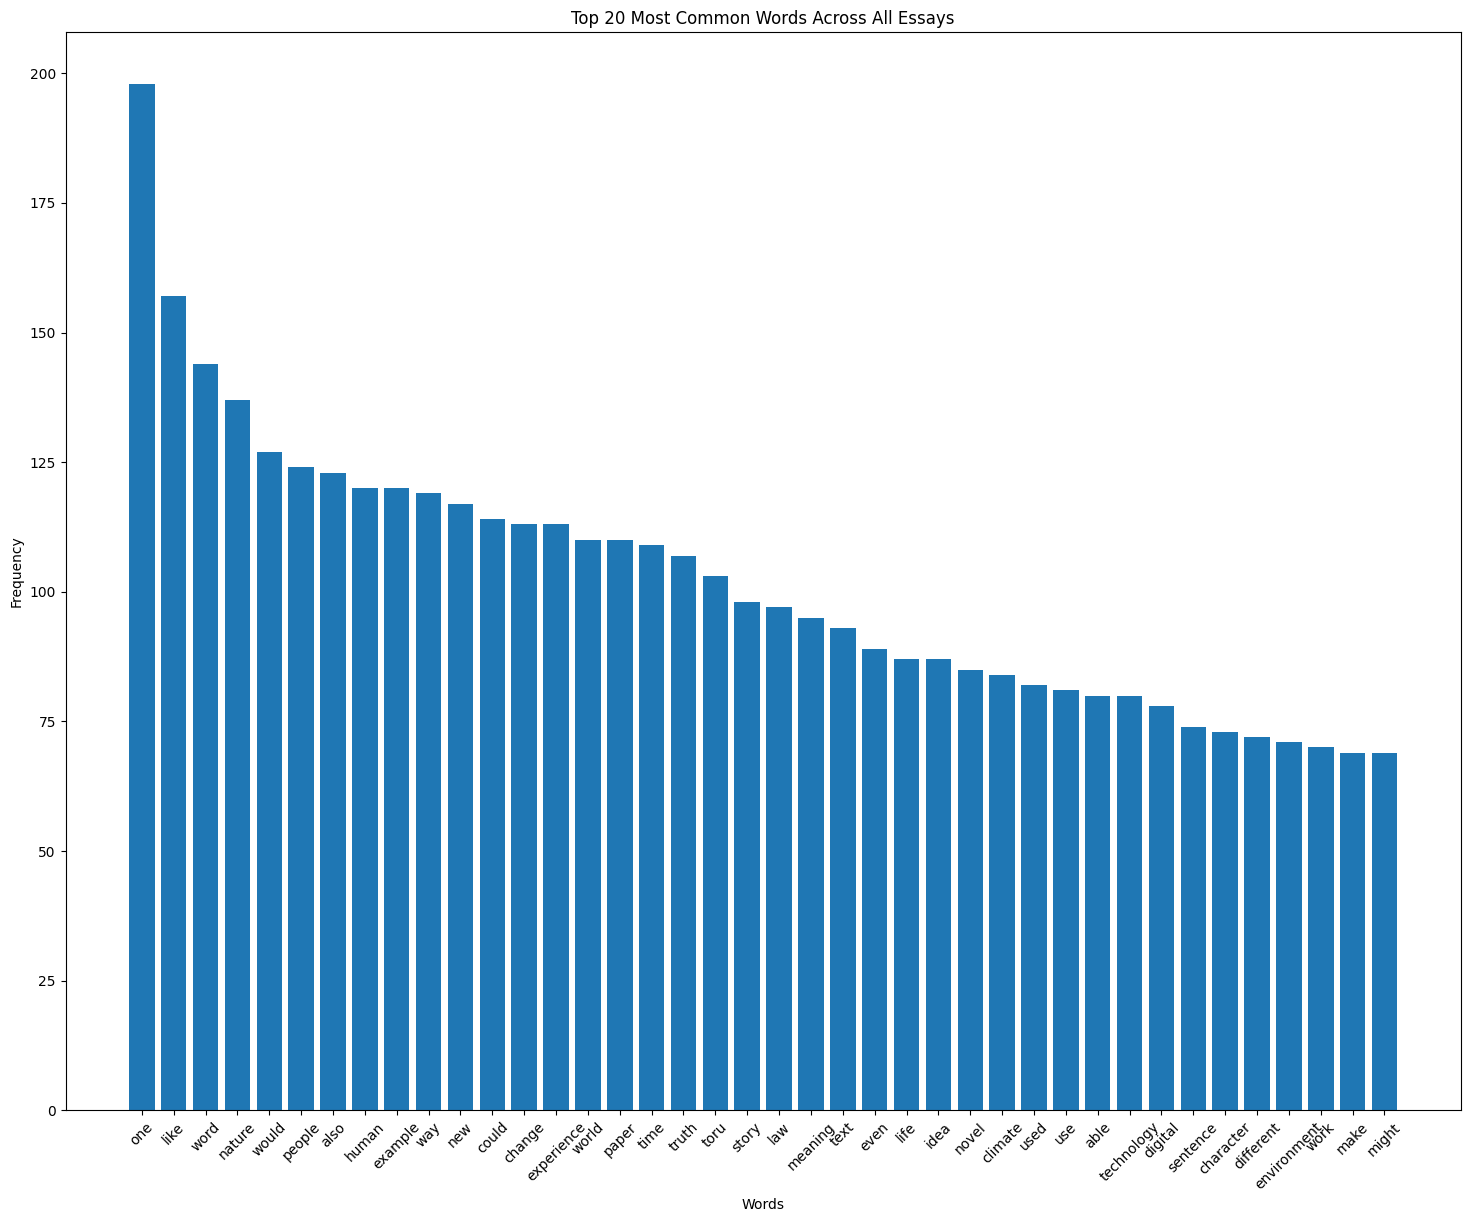

In [31]:
from nltk import FreqDist

freq_dist = FreqDist(all_words)

# Get the 20 most common words
most_common_words = freq_dist.most_common(40)
words, frequencies = zip(*most_common_words)

# Create a bar chart
plt.figure(figsize=(18, 14))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.title('Top 20 Most Common Words Across All Essays')
plt.show()

## Visualization Popular Word Frequency AI vs. Human

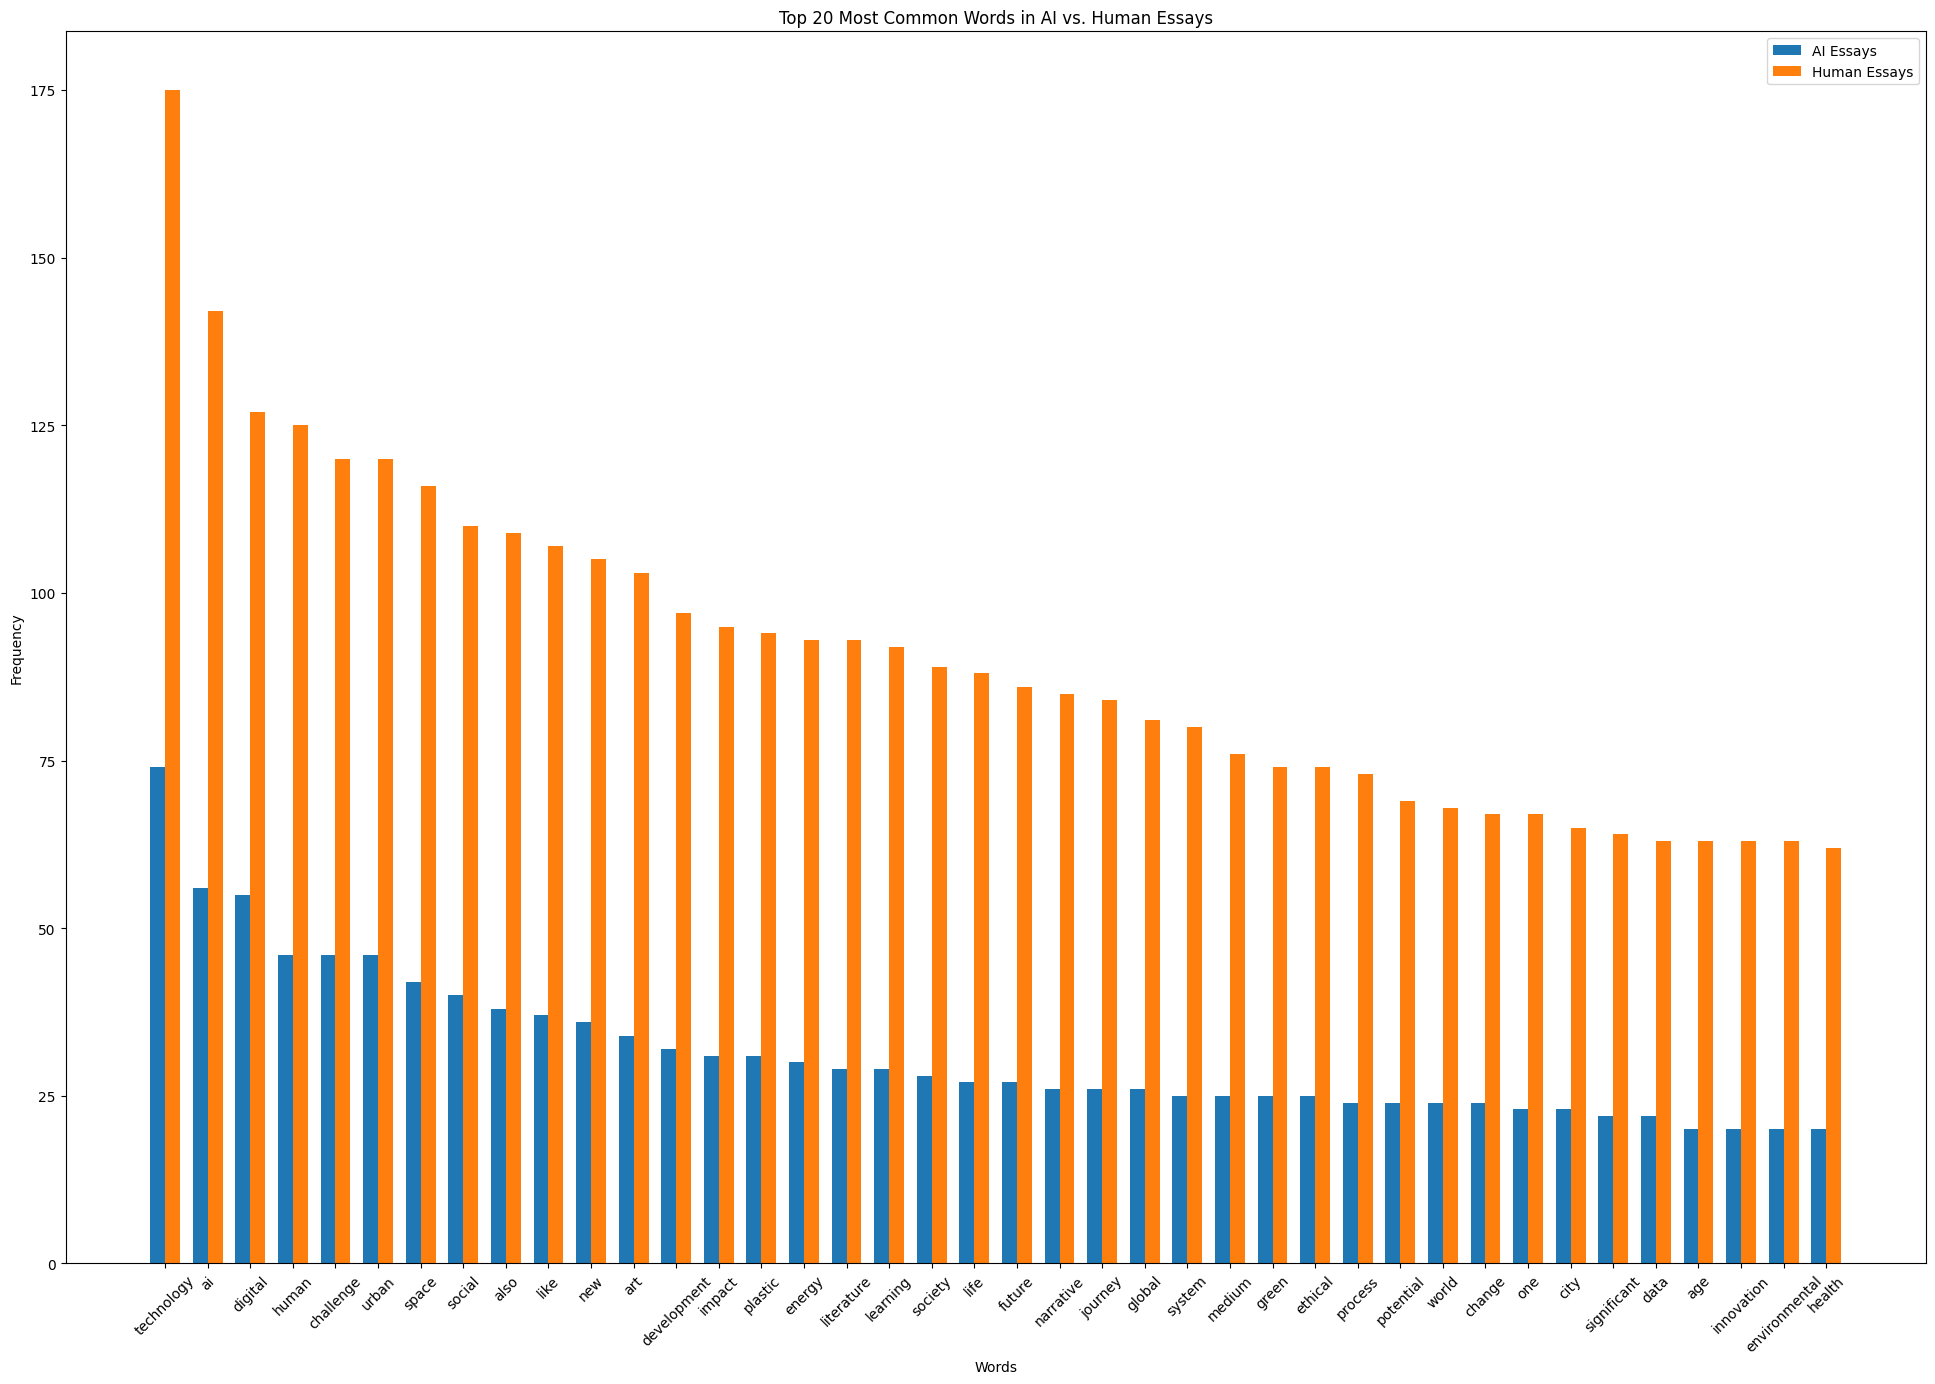

In [32]:
ai_essays = df_all_docs[df_all_docs['label'] == 'AI']['text']
human_essays = df_all_docs[df_all_docs['label'] == 'Human']['text']

ai_words = []
human_words = []

for essay in ai_essays:
    ai_words.extend(preprocess_text(essay))

for essay in human_essays:
    human_words.extend(preprocess_text(essay))

ai_freq_dist = FreqDist(ai_words)
human_freq_dist = FreqDist(human_words)

ai_common_words = ai_freq_dist.most_common(40)
human_common_words = human_freq_dist.most_common(40)

# Unpack words and frequencies
ai_words, ai_frequencies = zip(*ai_common_words)
human_words, human_frequencies = zip(*human_common_words)

# Create an index for each tick position
ind = np.arange(len(ai_common_words))
width = 0.35 

fig, ax = plt.subplots(figsize=(24, 16))

ai_bars = ax.bar(ind - width/2, ai_frequencies, width, label='AI Essays')
human_bars = ax.bar(ind + width/2, human_frequencies, width, label='Human Essays')


ax.set_xlabel('Words')
ax.set_ylabel('Frequency')
ax.set_title('Top 20 Most Common Words in AI vs. Human Essays')
ax.set_xticks(ind)
ax.set_xticklabels(ai_words)  
ax.legend()

plt.xticks(rotation=45)

plt.show()

## Frequency of Stop/Junk Words

Number of stopwords in AI essays: 4420
Number of stopwords in human essays: 26647
In AI essays, for every 100 other words, there are approximately 49.23 stopwords.
In human essays, for every 100 other words, there are approximately 71.19 stopwords.


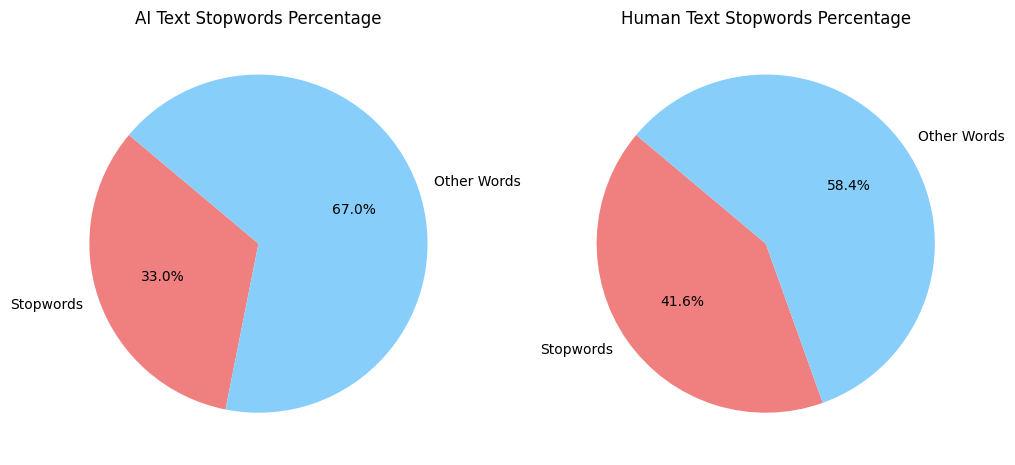

In [33]:
def stopword_analysis(ai_texts, human_texts):
    english_stopwords = set(stopwords.words('english'))
    
    ai_tokens = word_tokenize(ai_texts.lower())
    human_tokens = word_tokenize(human_texts.lower())
    
    # Filter out stopwords
    ai_stopwords = [token for token in ai_tokens if token in english_stopwords]
    human_stopwords = [token for token in human_tokens if token in english_stopwords]
    
    # Count stopwords and other words
    ai_stopwords_count = len(ai_stopwords)
    human_stopwords_count = len(human_stopwords)
    ai_other_words_count = len(ai_tokens) - ai_stopwords_count
    human_other_words_count = len(human_tokens) - human_stopwords_count
    
    # Calculate ratios and normalize per 100 non-stopword words
    ai_stopwords_ratio_per_100 = (ai_stopwords_count / ai_other_words_count) * 100
    human_stopwords_ratio_per_100 = (human_stopwords_count / human_other_words_count) * 100

            # Print number of stopwords
    print("Number of stopwords in AI essays:", ai_stopwords_count)
    print("Number of stopwords in human essays:", human_stopwords_count)
    
    # Print ratios with more descriptive text
    print(f"In AI essays, for every 100 other words, there are approximately {ai_stopwords_ratio_per_100:.2f} stopwords.")
    print(f"In human essays, for every 100 other words, there are approximately {human_stopwords_ratio_per_100:.2f} stopwords.")
    
    # Calculate percentages
    total_ai_words = len(ai_tokens)
    total_human_words = len(human_tokens)
    ai_stopwords_percentage = (ai_stopwords_count / total_ai_words) * 100
    human_stopwords_percentage = (human_stopwords_count / total_human_words) * 100
    
    # Plot pie charts
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    
    labels = ['Stopwords', 'Other Words']
    ai_sizes = [ai_stopwords_percentage, 100 - ai_stopwords_percentage]
    human_sizes = [human_stopwords_percentage, 100 - human_stopwords_percentage]
    colors = ['lightcoral', 'lightskyblue']
    
    axs[0].pie(ai_sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    axs[0].set_title('AI Text Stopwords Percentage')
    
    axs[1].pie(human_sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    axs[1].set_title('Human Text Stopwords Percentage')
    
    plt.show()

# Example texts, replace with your actual data
ai_texts = " ".join(df_all_docs[df_all_docs['label'] == 'AI']['text'])
human_texts = " ".join(df_all_docs[df_all_docs['label'] == 'Human']['text'])

stopword_analysis(ai_texts, human_texts)

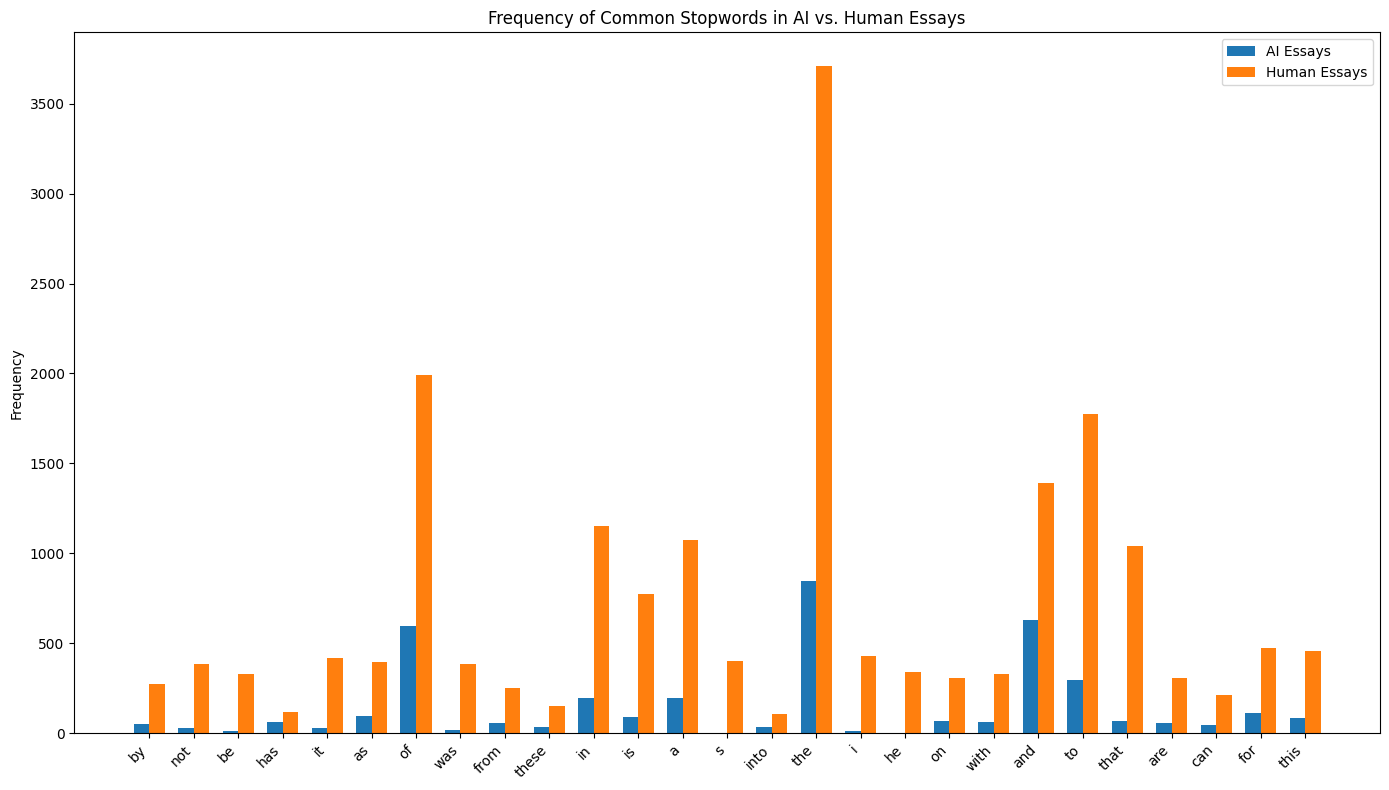

In [34]:
def aggregate_stopwords(texts):
    
    stopwords_counter = Counter()
    
    for text in texts:
        
        tokens = word_tokenize(text.lower())
        stopwords_counter.update([token for token in tokens if token in stopwords.words('english') and token.isalpha()])
        
    return stopwords_counter

# Collect stopwords for AI and Human essays
ai_stopwords = aggregate_stopwords(df_all_docs[df_all_docs['label'] == 'AI']['text'])
human_stopwords = aggregate_stopwords(df_all_docs[df_all_docs['label'] == 'Human']['text'])

# Identify common stopwords for comparison
common_stopwords = set([word for word, count in ai_stopwords.most_common(20)] + [word for word, count in human_stopwords.most_common(20)])
plot_data = {word: [ai_stopwords[word], human_stopwords[word]] for word in common_stopwords}

words = list(plot_data.keys())
ai_freqs = [plot_data[word][0] for word in words]
human_freqs = [plot_data[word][1] for word in words]

x = np.arange(len(words)) 
width = 0.35 

fig, ax = plt.subplots(figsize=(14, 8))
rects1 = ax.bar(x - width/2, ai_freqs, width, label='AI Essays')
rects2 = ax.bar(x + width/2, human_freqs, width, label='Human Essays')

ax.set_ylabel('Frequency')
ax.set_title('Frequency of Common Stopwords in AI vs. Human Essays')
ax.set_xticks(x)
ax.set_xticklabels(words, rotation=45, ha='right')
ax.legend()

fig.tight_layout()

plt.show()


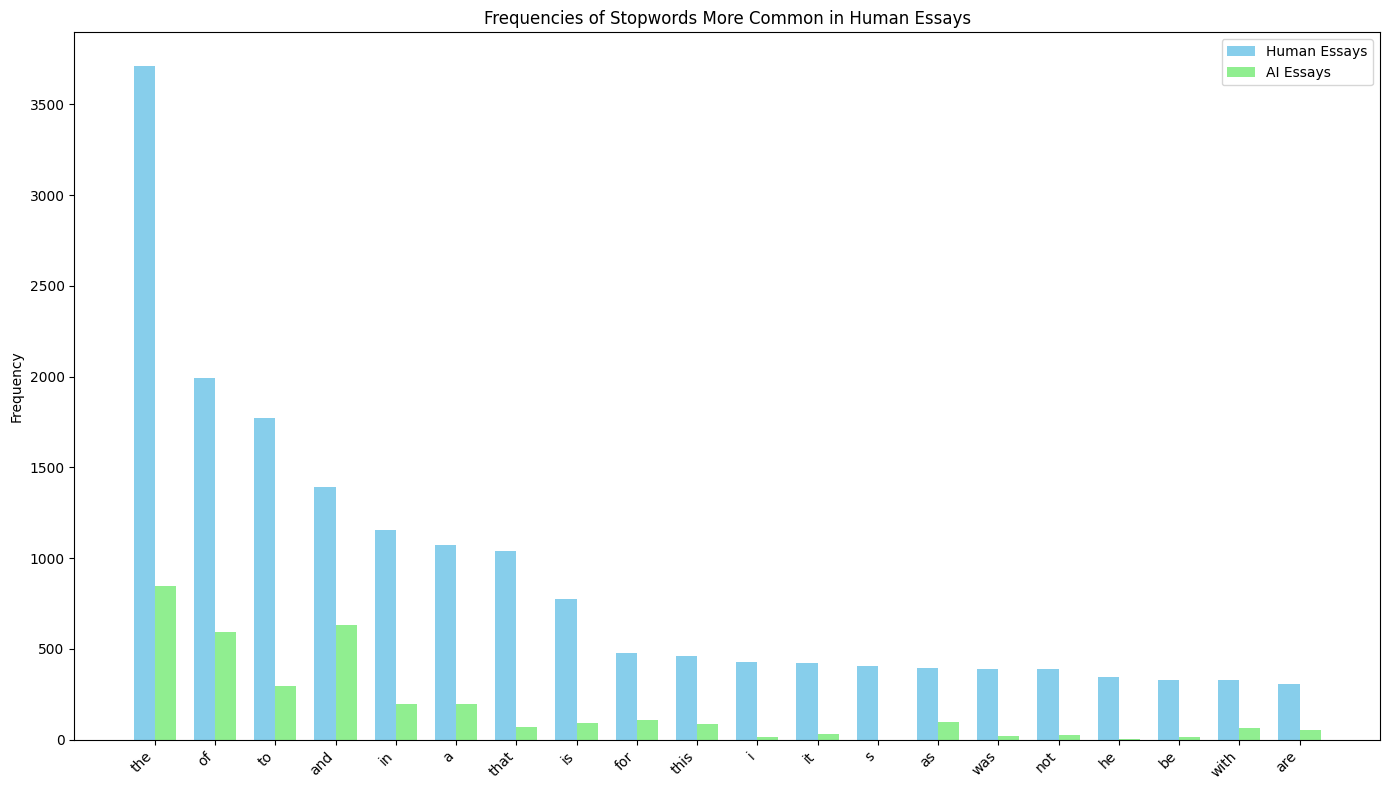

In [35]:
def get_stopword_frequencies(texts):
    
    stopword_counter = Counter()
    
    for text in texts:
        
        tokens = word_tokenize(text.lower())
        stopword_counter.update([token for token in tokens if token in stopwords.words('english')])
        
    return stopword_counter
    
# Collect stopword frequencies for AI and Human essays
ai_stopwords_freq = get_stopword_frequencies(df_all_docs[df_all_docs['label'] == 'AI']['text'])
human_stopwords_freq = get_stopword_frequencies(df_all_docs[df_all_docs['label'] == 'Human']['text'])

# Lookfor stopwords where human usage is at least 1.7 times of AI
significant_stopwords = {word: freq for word, freq in human_stopwords_freq.items() if freq > 1.7 * ai_stopwords_freq.get(word, 0)}

# Sort human stopwords by frequency
significant_stopwords_sorted = sorted(significant_stopwords.items(), key=lambda x: x[1], reverse=True)[:20]
words, human_freqs = zip(*significant_stopwords_sorted)
ai_freqs = [ai_stopwords_freq[word] for word in words]

x = np.arange(len(words))  
width = 0.35 
fig, ax = plt.subplots(figsize=(14, 8))
human_bars = ax.bar(x - width/2, human_freqs, width, label='Human Essays', color='skyblue')
ai_bars = ax.bar(x + width/2, ai_freqs, width, label='AI Essays', color='lightgreen')

ax.set_ylabel('Frequency')
ax.set_title('Frequencies of Stopwords More Common in Human Essays')
ax.set_xticks(x)
ax.set_xticklabels(words, rotation=45, ha='right')
ax.legend()

fig.tight_layout()
plt.show()

In [38]:
ai_texts = " ".join(df_all_docs[df_all_docs['label'] == 'AI']['text'])
human_texts = " ".join(df_all_docs[df_all_docs['label'] == 'Human']['text'])

ai_tokens = word_tokenize(ai_texts.lower())
human_tokens = word_tokenize(human_texts.lower())

# Frequency count for specified stopwords
stopwords_to_check = ['to', 'a', 'you', 'i', 'be', 'their', 'is', 'that', 'an', 'with']
stopword_counts = {'stopword': [], 'human': [], 'ai': []}

for sw in stopwords_to_check:
    human_count = human_tokens.count(sw)
    ai_count = ai_tokens.count(sw)
    stopword_counts['stopword'].append(sw)
    stopword_counts['human'].append(human_count)
    stopword_counts['ai'].append(ai_count)

stopword_counts_df = pd.DataFrame(stopword_counts)
chi_square_results = []

for sw in stopwords_to_check:
    human_count = stopword_counts_df[stopword_counts_df['stopword'] == sw]['human'].values[0]
    ai_count = stopword_counts_df[stopword_counts_df['stopword'] == sw]['ai'].values[0]
    
    # Contingency table
    table = [[human_count, len(human_tokens) - human_count], 
             [ai_count, len(ai_tokens) - ai_count]]
    
    # Perform chi-square test
    chi2, p, dof, expected = chi2_contingency(table)
    significance = 'significant' if p < 0.05 else 'insignificant'
    chi_square_results.append({'stopword': sw, 'chi2': chi2, 'p-value': '{:.7f}'.format(p), 'significance': significance})

# Convert results to DataFrame and format p-value
chi_square_results_df = pd.DataFrame(chi_square_results)
chi_square_results_df

,stopword,chi2,p-value,significance
0,to,12.767636,0.0003527,significant
1,a,2.743761,0.0976347,insignificant
2,you,22.887832,0.0000017,significant
3,i,59.284276,0.0000000,significant
4,be,42.984138,0.0000000,significant
5,their,4.988470,0.0255168,significant
6,is,29.113985,0.0000001,significant
7,that,95.842996,0.0000000,significant
8,an,15.130587,0.0001003,significant
9,with,0.568538,0.4508405,insignificant
